# Solution exercise 8 - Curse of dimensionality 

##  Preparing the data

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split

In [3]:
# Import data
df_wine = pd.read_csv('winequality-white.csv', sep=";", header=0)

##  Linear Regression

In [8]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_lin_regr = []
ls_r2_train_lin_regr = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Instantiate Regressor 
    lin_regr = LinearRegression()
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    lin_regr.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = lin_regr.predict(X_test)
    y_pred_train = lin_regr.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_lin_regr.append(r2_test)
    ls_r2_train_lin_regr.append(r2_train)

## Decision Tree

In [9]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_dec_tree = []
ls_r2_train_dec_tree = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Instantiate Regressor, using max_depth=6, since we already found out in exercise 6 that it is the best setting
    dec_tree = DecisionTreeRegressor(max_depth=6)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    dec_tree.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = dec_tree.predict(X_test)
    y_pred_train = dec_tree.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_dec_tree.append(r2_test)
    ls_r2_train_dec_tree.append(r2_train)

## Random Forest

In [10]:
# Initialize empty list (to be filled with average results afterwards) 
ls_r2_test_rf_regr = []
ls_r2_train_rf_regr = []

# trying different number of random dimensions
ls_dim = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000] 

# Loop over list of random dimensions
for dimension in ls_dim:
    # Create copy of the original df_wine
    df_wine_noise = df_wine.copy()
    # Create random data (size: length of dataframe x current dimensions)
    # This code is needed to always create the same random data
    random_data = np.random.RandomState(0).randn(dimension,len(df_wine_noise)).T
    # Turn random_data into a dataframe
    random_data = pd.DataFrame(random_data)
    # Add the created data with random values to the dataframe
    df_wine_noise = df_wine_noise.join(random_data)
    # Instantiate Regressor, restricting n_estimators only to reduce computation time
    rf_regr = RandomForestRegressor(n_estimators=20)
    # Define X and y in every loop, because we have a new dataframe (with random columns) in every loop
    X = df_wine_noise.drop(columns='quality')
    y = df_wine_noise.quality
    # 1. Split data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    # 2. Fitting the Regression
    rf_regr.fit(X_train, y_train)
    # 3. Test regressor with test data (and training data to compare them)
    y_pred_test = rf_regr.predict(X_test)
    y_pred_train = rf_regr.predict(X_train)
    # 4. Calc metric (e.g. r2)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # 5. Append score to list
    ls_r2_test_rf_regr.append(r2_test)
    ls_r2_train_rf_regr.append(r2_train)

# Exercise

Here are two extra exercises. You can **solve them in this notebook**, no need to create a new one.

 - Add 1000 and more dimensions to all of the three models and run them. 

 - Create a new plot with the outcomes (only testing data necessary) of all three different models in the same graph. Hint: After the first part of this exercise, you already computed all R² values and saved them to lists. You do not need to compute any new values for the plot.

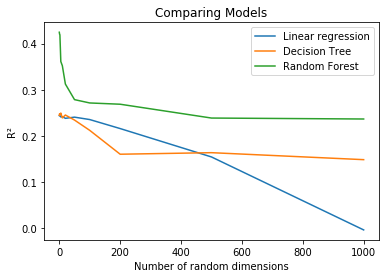

In [11]:
# plot of R2 values over depths
plt.plot(ls_dim, ls_r2_test_lin_regr, label="Linear regression")
plt.plot(ls_dim, ls_r2_test_dec_tree, label="Decision Tree")
plt.plot(ls_dim, ls_r2_test_rf_regr, label="Random Forest")
plt.title('Comparing Models')
plt.xlabel('Number of random dimensions')
plt.ylabel('R²')
plt.legend()
plt.show()

**The R² Score (of the testing set) of a linear regression decreases continuously as we add more dimensions. R² is almost at zero, when 1000 extra dimensions are added.**

**The R² Score (of the testing set) of a decision tree decreases as we add more dimensions. It drops faster, but then the curve flattens out at an R² of approximately 0.15, when 200 dimensions or more are added.**

**The R² Score (of the testing set) of a random forest behaves similar to the one of the decision tree, which is not surprising as they are very similar. The random forest just makes better predictions than a single decision tree. It is more robust to the curse of dimensionality.**